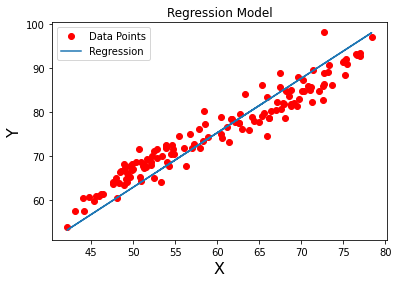

Final Weights b0 and b1:  1.0056078814756575 1.2376441956421456


In [8]:
import numpy as np
import matplotlib.pyplot as plt
def PlotRegression(h):
    plt.plot(x[:,1],data[:,1],'ro',label='Data Points')
    plt.plot(x[:,1], h[:], label = 'Regression')
    plt.xlabel('X', fontsize=16)
    plt.ylabel('Y', fontsize=16)
    plt.legend()
    plt.title("Regression Model")
def CostFunction(X, y, b0,b1):
    m = len(y)

    H = np.matmul(X,[[b0],[b1]])
    J = np.sum(np.square((H-y)))/(2*m)
 
    grad1 = (np.matmul((H-y).transpose(),X[:,0]))/m
    grad2 = (np.matmul((H-y).transpose(),X[:,1]))/m

    return grad1,grad2,J

def GradDescent(X,y, b0,b1, alpha, iter):
    J_total = np.zeros((iter,1))
    it = np.arange(iter)
    for i in range(iter):
        (grad1,grad2,J) = CostFunction(X, y,b0,b1)
        th1 = b0 - (alpha* grad1[0])
        th2 = b1 - (alpha* grad2[0])

        b0 = th1
        b1 = th2
        
        J_total[i,0] = J
    
    

    h = (x[:,0]*b0) + (x[:,1]*b1)

    return J_total, h,b0,b1

alpha = 0.0002
iter = 20
data = np.load('data.npy')
m,n = np.shape(data)
x = np.ones((m,2))

x[:,1] = data[:,0]
y = np.array(data[:,1])
y = np.reshape(y,(-1,1))

b0 = 1
b1 = 1
J_total,h,B0,B1 = GradDescent(x, y,b0,b1,alpha,iter)
PlotRegression(h)
plt.show()
print('Final Weights b0 and b1: ',B0,B1)

In [9]:
def PlotRegression(h):
    plt.plot(x[:,1],data[:,1],'ro',label='Data Points')
    plt.plot(x[:,1], h[:], label = 'Regression')
    plt.xlabel('X', fontsize=16)
    plt.ylabel('Y', fontsize=16)
    plt.legend()
    plt.title("Regression Model")

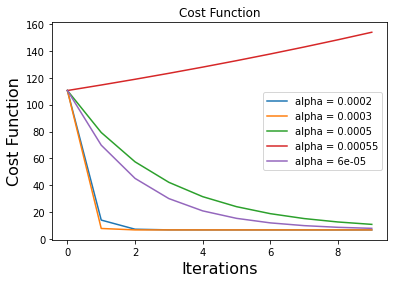

In [10]:
alpha = [0.0002,0.0003, 0.0005,0.00055,0.00006]
iter = 10
def plotCost(i):
    J_total,h,B0,B1 = GradDescent(x, y,b0,b1,i,iter)
    it = np.arange(iter)
    plt.plot(it,J_total,label='alpha = ' + str(i))
    plt.title("Cost Function")
    plt.xlabel('Iterations', fontsize=16)
    plt.ylabel('Cost Function', fontsize=16)   
    plt.legend()
    
for i in alpha:
    plotCost(i)
plt.show()    




The best learning rate that I found out was alpha = 0003. It was observed that at alpha = 0.0003,
the cost function converged the quickest and was settling down near zero. All the other ranges of alpha
resulted in either slow convergence or divergence. (Through trial and error method)


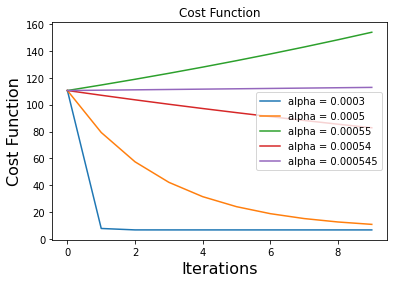

In [12]:
alpha = [0.0003,0.0005,0.00055,0.00054,0.000545]
for i in alpha:
    plotCost(i)
plt.show()    



The cost function starts diverging at alpha = 0.000545. At alpha = 0.00054, the cost function is reducing gradually and will eventually converge.
At alpha = 0.00055, the cost function is clearly diverging. From this trend, we can clearly see that as the learning rate increases, the cost function 
diverges.


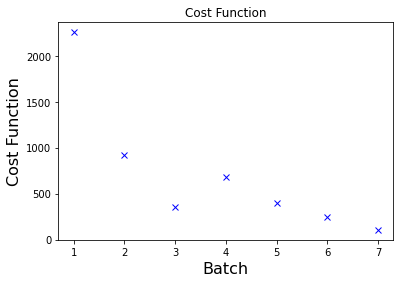

In [14]:
# Mini Batch
BatchSize = 20
alpha = 0.0001
m = len(y)
b0 = 0
b1 = 0
iter = 1

np.random.shuffle(x)

def plotCostBatch(i,J_total):
    

    plt.plot(i+1,float(J_total),'xb-')
    plt.title("Cost Function")
    plt.xlabel('Batch', fontsize=16)
    plt.ylabel('Cost Function', fontsize=16)   

for i in range(int(m/BatchSize)):
    J_total,h,B0,B1 = GradDescent(x[(i)*BatchSize:(i+1)*BatchSize,:], y[(i)*BatchSize:(i+1)*BatchSize,:],b0,b1,alpha,iter)
    float(J_total)
    b0 = B0
    b1 = B1
    plotCostBatch(i,J_total)


    